## Log data munging and EDA

Just getting set up, testing

In [1]:
import pandas as pd
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.insert(0,'../')

import mysticbit
from mysticbit import munging, ml, plots

Do you really want to drill me?
Do you really want to make me cry
AH AH AH AH


In [3]:
df_logs = munging.load_log_data()

df_ml = munging.create_ml_dataframe(df_logs, feature_lags = range(10), label_lags = range(5))

df_ml_train, df_ml_test = ml.train_test_split(df_ml)

Train well:  {'G09', 'B13', 'B14', 'B08', 'G12', 'G17', 'B12', 'G16', 'G06', 'G08', 'G15', 'B0700', 'B200', 'G10', 'G070'}
Test wells:  {'B03', 'B05', 'B06'}


In [4]:
X_cols = [c for c in df_ml_train.columns if 'lag' in c]
y_cols = [c for c in df_ml_train.columns if 'futr' in c]

print('X cols: ', X_cols)
print('y cols: ', y_cols)

X cols:  ['GR_lag_0', 'GR_lag_1', 'GR_lag_2', 'GR_lag_3', 'GR_lag_4', 'GR_lag_5', 'GR_lag_6', 'GR_lag_7', 'GR_lag_8', 'GR_lag_9']
y cols:  ['GR_futr_0', 'GR_futr_1', 'GR_futr_2', 'GR_futr_3', 'GR_futr_4']


In [5]:
models = ml.make_multiple_models(df_ml_train, X_cols, y_cols)

In [6]:
df_pred = ml.make_predictions(models, df_ml, X_cols, y_cols)

In [7]:
df_pred.head()

,TVDSS,HACKANAME,RES_ID,GR,GR_lag_0,GR_lag_1,GR_lag_2,GR_lag_3,GR_lag_4,GR_lag_5,...,GR_futr_0_pred_base,GR_futr_1_pred_base,GR_futr_2_pred_base,GR_futr_3_pred_base,GR_futr_4_pred_base,GR_futr_0_pred_low,GR_futr_1_pred_low,GR_futr_2_pred_low,GR_futr_3_pred_low,GR_futr_4_pred_low
12,1568.4,B03,3005.0,36.68,36.68,39.76,48.13,48.13,50.206667,52.283333,...,36.551403,35.919242,36.693345,37.090855,38.164725,36.115259,35.642161,34.448244,34.814144,33.240164
13,1568.6,B03,3005.0,32.18,32.18,36.68,39.76,48.13,48.130000,50.206667,...,32.066622,32.727182,32.257074,33.458360,32.877335,32.196095,31.340647,29.940841,29.419546,29.121877
14,1568.8,B03,3005.0,31.90,31.90,32.18,36.68,39.76,48.130000,48.130000,...,31.785758,32.227352,32.257074,32.936904,32.786115,30.917095,30.494934,29.940841,29.825603,29.276685
15,1569.0,B03,3005.0,35.10,35.10,31.90,32.18,36.68,39.760000,48.130000,...,34.943178,35.955328,35.852828,34.981608,36.981288,34.814395,33.731273,32.910660,33.951594,32.752714
16,1569.2,B03,3005.0,42.44,42.44,35.10,31.90,32.18,36.680000,39.760000,...,42.207254,42.814183,44.102335,45.486886,46.413498,42.077399,40.138586,39.071629,38.109498,37.385537


In [8]:
well_name = 'B03'
bit_depth = 1569.0
tol = 50

In [9]:
predictions = munging.get_log_predictions(df_pred, well_name, bit_depth)

predictions.head()

,HACKANAME,TVDSS_bit_depth,pred_col,value,offset,log_name,model_name,TVDSS
0,B03,1568.4,GR_futr_0_pred_high,53.783321,0.0,GR,high,1568.4
1,B03,1568.4,GR_futr_1_pred_high,39.002571,1.0,GR,high,1569.4
2,B03,1568.4,GR_futr_2_pred_high,43.621011,2.0,GR,high,1570.4
3,B03,1568.4,GR_futr_3_pred_high,48.364524,3.0,GR,high,1571.4
4,B03,1568.4,GR_futr_4_pred_high,52.735920,4.0,GR,high,1572.4


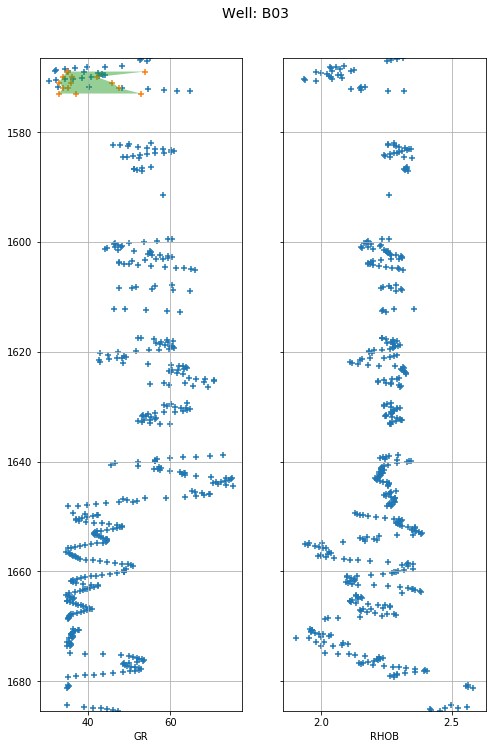

updated


In [14]:
def plot_predictions(df_logs, df_pred, well_name, bit_depth):
    try:
        f, ax = plots.make_log_plot(df_logs, well_name, cols=['GR', 'RHOB'])
        predictions = munging.get_log_predictions(df_pred, well_name, bit_depth)
        
        plots.add_predictions(ax[0], predictions)
        
        #for axs in ax:
            #axs.set_ylim(1800, 1760)
        plt.show()
        
        print('updated')
        
    except AssertionError:
        #f, ax = plots.make_log_plot(df_logs, well_name)
        print('no predictions found at this depth in this well')


interact(plot_predictions, df_logs=fixed(df_logs), df_pred=fixed(df_pred),
         well_name=fixed(well_name), bit_depth=(1560, 1580, 1));

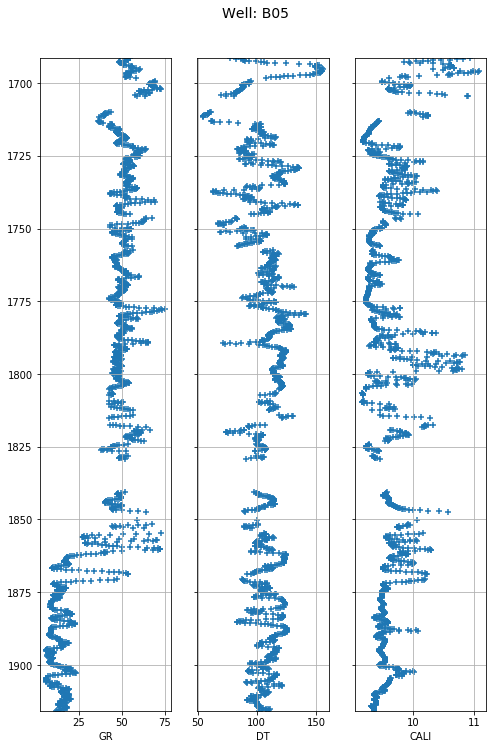

In [45]:
f, ax = plots.make_log_plot(df_logs, 'B05')
ax[0].scatter(predictions['value'], predictions['TVDSS'], marker='+')